# Introduction to Natural Language Processing

We will make use of NLTK package of python

In [1]:
import nltk as nt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
df = pd.DataFrame({'title':['the Delicious boiled egg',
                            'Fried egg ','Split in orange',
                            'There is Something else'], 
                   'page':[1, 2, 3, 4]})
df

,title,page
0,the Delicious boiled egg,1
1,Fried egg,2
2,Split in orange,3
3,There is Something else,4


In [ ]:
nt.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
stop = nt.corpus.stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
vectorizer = CountVectorizer(analyzer = "word",tokenizer = None, 
                             preprocessor = None, stop_words = stop, 
                             max_features = 5000)


In [6]:
df2=pd.DataFrame(vectorizer.fit_transform(df.title).toarray(),columns=vectorizer.get_feature_names())

In [7]:
print(df2)

   boiled  delicious  egg  else  fried  orange  something  split
0       1          1    1     0      0       0          0      0
1       0          0    1     0      1       0          0      0
2       0          0    0     0      0       1          0      1
3       0          0    0     1      0       0          1      0


In [8]:
#word count without removing stopwords
print('TDM without removing stop words')
print(pd.Series(' '.join(df['title']).lower().split()).value_counts()
)

#word count after removing stopwords
print('Word count after removing stop words')
tdm = pd.DataFrame(vectorizer.fit_transform(df.title).toarray(), columns=vectorizer.get_feature_names())

print('Word count =',tdm.sum(axis=None))

#word association
print('td.corr =',tdm.corr())

#association for the word 
print(tdm.corr()['delicious'])

#set a threshold
egg = tdm.corr()['egg']

print(egg)

print(egg[egg>0])

TDM without removing stop words
egg          2
split        1
is           1
there        1
delicious    1
orange       1
the          1
boiled       1
something    1
in           1
else         1
fried        1
dtype: int64
Word count after removing stop words
Word count = boiled       1
delicious    1
egg          2
else         1
fried        1
orange       1
something    1
split        1
dtype: int64
td.corr =              boiled  delicious      egg      else     fried    orange  \
boiled     1.000000   1.000000  0.57735 -0.333333 -0.333333 -0.333333   
delicious  1.000000   1.000000  0.57735 -0.333333 -0.333333 -0.333333   
egg        0.577350   0.577350  1.00000 -0.577350  0.577350 -0.577350   
else      -0.333333  -0.333333 -0.57735  1.000000 -0.333333 -0.333333   
fried     -0.333333  -0.333333  0.57735 -0.333333  1.000000 -0.333333   
orange    -0.333333  -0.333333 -0.57735 -0.333333 -0.333333  1.000000   
something -0.333333  -0.333333 -0.57735  1.000000 -0.333333 -0.333333  

## Word Cloud

In [13]:
import wordcloud as wd

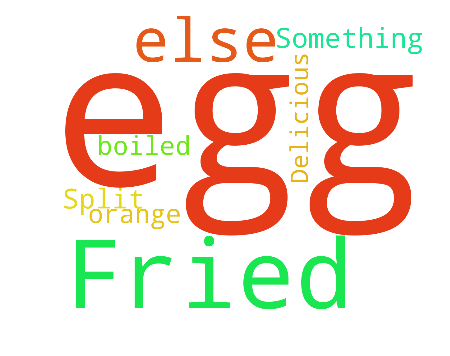

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#Convert all the required text into a single string here 
#and store them in word_string
#you can specify fonts, stopwords, background color and other options
wordcloud = WordCloud(stopwords=STOPWORDS,
background_color='white',
width=1200,
height=1000
).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


## Tokenizer

In [ ]:
nt.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [10]:
nt.tokenize.word_tokenize('THIS IS GREAT')

['THIS', 'IS', 'GREAT']

In [11]:
#from nltk.token import WSTokenizer                             
#from nltk.draw.plot import Plot  

#Extract a list of words from the corpus 
corpus = open('Corpus.txt').read()
tokens = nt.tokenize.word_tokenize(corpus) 

# Count up how many times each word length occurs 
wordlen_count_list = []
for token in tokens:
    
    Wordlen = len(token.type())
    
    # Add zeros until wordlen_count_list is long enough
    while wordlen >= len(wordlen_count_list):
        wordlen_count_list.append(0)
    # Increment the count for this word length 
        wordlen_count_list[wordlen] += 1 

Plot(wordlen_count_list)


FileNotFoundError: [Errno 2] No such file or directory: 'Corpus.txt'